In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[337,  20],
       [ 30, 182]], dtype=int64)

* 정확도

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9121265377855887

* 정밀도

In [7]:
from sklearn.metrics import precision_score
precision_score(y,y_pred)

0.900990099009901

* 재현율

In [9]:
from sklearn.metrics import recall_score
recall_score(y,y_pred)

0.8584905660377359

* F1 score

In [10]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [38]:
from sklearn.preprocessing import Binarizer

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
pred_proba = model_lor.predict_proba(X)
y_pred1= pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = 0.1)
y_pred2 = binarizer.fit_transform(y_pred1)

In [41]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print(confusion_matrix(y,y_pred2))
print(accuracy_score(y,y_pred2))
print(precision_score(y,y_pred2))
print(recall_score(y,y_pred2))
print(f1_score(y, y_pred))

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8792270531400966


* ROC 곡선 시각화

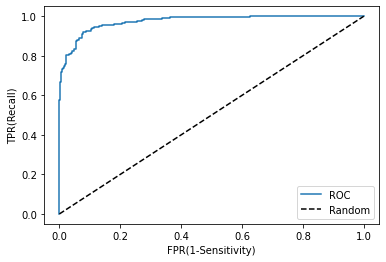

In [44]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
pred_proba_class1 = model_lor.predict_proba(X)[:,1]
fprs,tprs,thresholds = roc_curve(y,pred_proba_class1)

def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1], [0,1], 'k--', label='Random')

    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y, pred_proba[:, 1])

* ROC AUC 값

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y,y_pred)
roc_auc

0.9012340785370753